# Workflows, Jobs and Steps
## Learn the building blocs of Github Actions

### Workflows 
  - Workflows are defined at the repository level.
  - They also define which triggers actually start the workflow.
  - Workflows are consist of one or more jobs.

### Jobs
- Jobs are then defined at the workflow level and can't be created outside of workflow levels
- Jobs also define in which execution environment they will run(example linux windows or mac)
- Jobs are composed of one or more steps.
- by default jobs are run in parallel(example if you have five jobs and you do not specify any dependency between these jobs , they will all start at same time
- please note that it is not necessary that these jobs will run in same vm.
  when a workflow is triggered.

### Steps
- Steps are defined at the job level.
- Steps define the actual script or GitHub Action that will be executed onces that step is run.
- Steps always run sequentially, if you want to run these steps in parallel then define these steps in different jobs which runs parallel.


Note: Think of GitHub Action as feature offered by GitHub as whole thing which comprises workflow, jobs and steps. so github action is something piece of code we run from market place or from some place.

<img src= "./images/gh-action-block.png">

## Exercise 01 - Creating Our First Workflow

Here are the instructions for the exercise
1. Create a file named 01-building-blocks.yaml under .github/workflows folder in you root of your repository
2. Name the workflow `01 - Building Blocks`
3. Add the following trigger to your workflow:
    a. `push`
    b. `workflow_dispatch`

4. Add two jobs to the workflow
    a. The first job `echo-hello`, should run on the ubuntu-latest and having a single step, named 'Say Hello', which simply prints "Hello World!" message on the screen.
    b. The second job, `echo-goodbye`, should also run on the `ubuntu-latest` and have two steps:
    
        i.  The first step named `Failed step`, should run a multiline bash script which prints "I will fail" on the screen and exits with any non-zero code.
        ii. The second step, named `Say goodbye`, should simply print `"Goodbye!"` on the screen.

5. Take some time to play around and inspect what happens once a step fails during the workflow execution.

6. As a last step, change the first step of the second job to exit with a zero code. You can also adjust the name of the step and the printed message to match the new state.

Have a look at how this impacts the workflow execution.

7. Change the workflow triggers to contain only `workflow_dispatch` to prevent this workflow from running with every push and pollute the list of workflow runs.

Note: By default in Github action if a step fails then whole job is considered as fail resulting workflow considered as failed.

## Workflow Events
**Triggering workflows in multiple ways**

1. **Repository Event**
   - If any event happens at a repository level (push, issues, pull_request, pull_request_review, fork, etc).

2. **Manual Trigger**
   - We can trigger workflows from the UI, API, from other workflows etc as long as we specify trigger in GitHub yaml file.

3. **Schedule**
   - We can actually run a workflow as a cron job, as long as we specify the schedule for the workflow as a chronic expression.


<img src="./images/triggers.png">

## Practical Exercise 02 - Using Different Events to Trigger Workflows
### Exercise Description
In this practical exercise, our goal is to explore the different ways we can trigger workflows in GitHub Actions.

Here are the instructions for the exercise:

1. Create a file named `02-workflow-events.yaml` under the `.github/workflows` folder in the root of your repository.

2. Name the workflow `02 - Workflow Events`.

3. Add the following triggers to your workflow:
    a. `push`

4. Add a single job to the workflow:

    a. The job, named `echo`, should run on `ubuntu-latest` and contain a single step, named `Show the trigger`, which prints the type of the name of the event that triggered the workflow.

5. Commit the changes and push the code. Take some time to inspect the output of the workflow run.

6. Now add more triggers to the workflow:

    a. `pull_request`

    b. `schedule` cron expression

    c. `workflow_dispatch`

7. Commit the changes and push the code. Take some time to inspect the different ways the workflow is triggered.
    a. You can create a pull request on GitHub to see how this changes the output of the workflow run.
    b. Also give it a try to trigger it from the UI. To do so 

      - Click under the "Actions" tab in the home page of the repository.
      - Select the workflow named `02 - Workflow Events` on the left of the screen.
      - Click on the "Run workflow" button on the right side of the screen, next to the message "This workflow has a `workflow_dispatch` event trigger."

8. After exploring the different ways to trigger a workflow, reduce the list of triggers to leave only workflow_dispatch to prevent this workflow from running with every push and pollute the list of workflow runs.

### Tips
#### Using a valid cron syntax

At the time of this recording, GitHub Actions does not support cron job definitions containing six elements (for example, `'0 0 * * * *'`), only definitions containing five elements. Check the resources section of this lecture for a cron generator that uses the valid syntax.

To define a trigger using cron, you should use the following syntax:
```yaml
on:
  schedule:
    - cron: '<cron expression>'
```
**Accessing the name of the event that triggered the workflow**

To access the name of the event triggering the workflow, you can use the following special syntax: ${{ github.event_name }}. For example:
```yaml
steps:
  - name: Event name
    run: |
      echo "Event name: ${{ github.event_name }}"
```




## Workflow Runners

- We can think of workflow runners as virtual servers, so vms that actually execute jobs from workflows.
- We can either use github hosted runners(standard/large).
- We can also have self hosted runners and inform github about that.

- Github hosted runners are managed service, so we don't have to worry about updates, security, patching etc.
- job steps share same vm but job don't.


Self hosted runners allows to run workflows pretty much on any infrastructure we want.

<img src= "./images/runners.png">

### Practical Exercise 03 - Working with Windows and Ubuntu Runners
**Exercise Description**
  In this practical exercise, our goal is to explore different possibilities for setting runners for our workflows.

  Here are the instructions for the exercise:

1. Create a file named `03-workflow-runners.yaml` under the `.github/workflows` folder in the root of your repository.

2. Name the workflow `03 - Workflow Runners`.

3. Add the following triggers to your workflow:

    a. `push`

4. Add three jobs to the workflow:

    a. The first job, `ubuntu-echo`, should run on `ubuntu-latest` and have a single step, named `Show OS`, which runs a
    multi-line bash script printing `"This job is running on an Ubuntu runner."`, and then the runner OS on the next line.

    b. The second job, `windows-echo`, should run on `windows-latest` and have a single step, named `Show OS`, which runs a
    multi-line bash script printing `"This job is running on a Windows runner."`, and then the runner OS on the next line.

    c. The third job, `mac-echo`, should run on `macos-latest` and have a single step, named `Show OS`, which runs a multi-line
     bash script printing `"This job is running on a MacOS runner."`, and then the runner OS on the next line.

5. Change the workflow triggers to contain only `workflow_dispatch` to prevent this workflow from running with every push and
   pollute the list of workflow runs.

#### Tips
**Be careful with MacOS runners, they are expensive!**

MacOS runners are expensive when used in private repositories, and they can easily consume all the free minutes we have available for the month! Be careful if you are running your workflows in a private repository.

**How to access the runner OS**

The runner OS is available as an environment variable named $RUNNER_OS.

**Accessing environment variables in Windows**

Window's default shell is not compatible with bash-like syntax for accessing environment variables. You can either use a compatible method, or use bash by explicitly setting the shell for the respective step:
```yaml
steps: 
  - name: Show OS 
    shell: bash 
    run: echo "I'm running on bash."
```

## GitHub Actions

- So previously we have discussed that there are other ways for us to execute logic in GitHub workflows that do not include running shell scripts, and we do it through actions(its not the Github action which is a complete solution).
- We can use different actions with in workflow.

<img src = "./images/actions.png">

**Github Action Marketplace: https://github.com/marketplace**

## Practical Exercise 04 - Working with Third-Party Custom Actions
##### Exercise Description
In this practical exercise, our goal is to explore how we can use third-party custom actions to perform tasks without having to define them from scratch.

In order to achieve that, we will leverage a React application that we will scaffold with the help of the create-react-app utility. Check the tips section for the specific command to scaffold your React application. Here are the instructions for the exercise:

1. Generate a React application:

    a. Create a new folder named `04-using-actions` at the root of the repository.

    b. Using a terminal, cd into this directory and scaffold a React application inside a `react-app` directory. You can either create the directory
     yourself or let the `create-react-app` utility do it for you.

    c. Once the React setup is done, you should see a success message.

    d. Take a few moments to inspect the files and get familiar with the application folder structure.

2. Create the first version of the workflow:

    a. Create a file named `04-using-actions.yaml` under the `.github/workflows` folder at the root of your repository.

    b. Name the `workflow 04 - Using Actions`.

    c. Add the following triggers to your workflow:

        -  `push`

    d. Add a single job named `build` to the workflow. The job should contain two steps:

    i. The first one, named `Checkout Code`, should checkout the repository code into the current working directory.

    ii. The second one, named `Printing Folders`, should simply print the folder structure after the checkout command.

    e. Commit the changes and push the code.

    f. Take a few moments to inspect the output of the workflow run.

3. Extend the workflow to setup node and install the dependencies of the React application

    a. Remove the `Printing Folders` step.

    b. Add a new step after the `Checkout Code` step. This new step should be named `Setup Node` and setup node using the `20.x` version.

    c. Add a new step after the `Setup Node` step. This new step should be named `Install Dependencies` install the dependencies of our React application by running the `npm ci` command inside the React application folder. You can either `cd` into the directory before running the `npm ci` command, or you can pass the working directory by adding a `working-directory: 04-using-actions/react-app` option to the step (as a sibling key to `name` and `run`).

    d. Commit the changes and push the code.

    e. Take a few moments to inspect the output of the workflow run.

4. Extend the workflow to execute the automated tests from the React application:

    a. Add a new step after the `Install Dependencies` step. This new step should be named Run Unit Tests and it should execute the automated tests by running the npm run test command inside the React application folder. You can either `cd` into the directory before running the `npm run test` command, or you can pass the working directory by adding a `working-directory: 04-using-actions/react-app` option to the step (as a sibling key to `name` and `run`).

    b. Commit the changes and push the code.

    c. Take a few moments to inspect the output of the workflow run.

5. Change the workflow triggers to contain only `workflow_dispatch` to prevent this workflow from running with every push and pollute the list of workflow runs.

### Tips
#### Scaffolding a React application with create-react-app

To generate a React application with a single command, you can leverage the create-react-app utility. In order to do that, simply run the following inside the `04-using-actions folder: npx create-react-app --template typescript react-app`.

#### Using third-party actions in GitHub Actions Workflows

The syntax to leverage a third-party action is very simple. Instead of using the run key and defining a shell script, you should use the uses key and pass the name and the version of the action you wish to use. Here is an example of the syntax:
```yaml
steps:
  - name: Using the Checkout Action
    uses: actions/checkout@v4
```
#### Useful third-party actions for this exercise

1. `actions/checkout@v4`: used to checkout the repository code into the working directory of the workflow run. Without this, we cannot work with the code from our repository.

2. `actions/setup-node@v4`: used to setup node with a specific version, as well as any other necessary dependencies. To provide a specific version of Node to be setup, you can use the following syntax:

```yaml
steps:
  - name: Setup Node
    uses: actions/setup-node@v4
    with:
      node-version: '20.x'
```

### Create react-app

<img src="./images/react.png">

>`cd react-app`
> `npm run start`

## Event Filters

Event filters allows us to specify under which conditions a specific event triggers our workflow.

for example we have used `push` event, but we can also filter that, which means we can have the `push` event trigger for specific branches.
or we can also ignore some of the branches.

We also can specify paths, tags and many other special filters.
<img src="./images/filters.png"/>

for example in above example we have trigger only one branch is main or anything starting with `release/**`, and ignores changes in path `docs/**`.


## Activity Types in GitHub Actions
Activity types allows us to specify which types of certain triggers execute our workflow.
Many triggers have a multiple activity types we can leverage.

<img src="./images/activity.png"/>


## Practical Exercise 05 - Using Filters and Activity Types
**Exercise Description**
In this practical exercise, our goal is to explore the different ways we can use event filters and activity types to better target when workflows are run.

We will create two workflows for this practical exercise. Here are the instructions for the exercise:

1. **Creating our first workflow:**

    a. Create a file named `05-1-filters-activity-types.yaml` under the `.github/workflows` folder at the root of your repository.

    b. Name the workflow `05 - 1 - Event Filters and Activity Types`.

    c. Add the following triggers with event filters and activity types to your workflow:

    i. `pull_request`: use activity types to restrict the activities only to `opened` and `synchronize`. Additionally, use use event filters to restrict this workflow runs to be triggered only by changes to the `main` branch.

    d. Add a single job named  `echo` to the workflow. The job should contain a single step, which simply prints the following message to the screen: `Running whenever a PR is opened or synchronized AND base branch is main`.

    e. Commit the changes and push the code.

    f. Edit the `README.md` file at the root of the repository with whatever changes you see fit, and commit the changes to a new branch named `pr-test-1` (on the UI, this option is at the bottom of the window that appears when you want to save the changes).

Create a pull request from pr-test-1 to the main branch and take a few moments to inspect the output of the triggered workflow run.

2. **Creating our second workflow:**

    a. Create a file named `05-2-filters-activity-types.yaml` under the `.github/workflows` folder at the root of your repository.

    b. Name the workflow `05 - 2 - Event Filters and Activity Types`.

    c. Add the following triggers with event filters and activity types to your workflow:

    i. `pull_request`: use activity types to restrict the activities only to `closed`. Additionally, use use event filters to restrict this workflow runs to be triggered only by changes to the `main` branch.

    d. Add a single job named `echo` to the workflow. The job should contain a single step, which simply prints the following message to the screen: `Running whenever a PR is closed`.

    e. Commit the changes and push the code.

    f. Close the PR opened in step 1 of this practical exercise and take a few moments to inspect the output of the triggered workflow run.

3. Change the workflow triggers to contain only `workflow_dispatch` to prevent this workflow from running with every push and pollute the list of workflow runs.

## Work Flow Contexts
**Access informations about runs, variables, jobs and much more.**

Github provides multiple sources of data in different contexts so that we can easily provide all the necessary information to our workloads.

Here are some examples of provided contexts:


<img src="./images/context.png">


https://docs.github.com/en/actions/learn-github-actions/contexts







## Practical Exercise 06 - Working with Different Contexts

### Exercise Description
**In this practical exercise, our goal is to work with different contexts available during workflow runs.**

Here are the instructions for the exercise:

1. Creating the first version of the workflow:

    a. Create a file named `06-contexts.yaml` under the `.github/workflows` folder in the root of your repository.

    b. Name the workflow `06 - Contexts`.

    c. Add the following triggers to your workflow:

    i. `push`

    ii. `workflow_dispatch`

    d. Add a single job to the workflow. The job, named `echo-data`, should run on `ubuntu-latest` and contain two steps:

    1.  The first step, named `Display Information`, should print the following lines containing information from the `github` context (tip: use a multi-line script with several `echo commands`):

    i. `"Event name: <retrieve the event name here>"`

    ii. `"Ref: <retrieve the ref here>"`

    iii. `"SHA: <retrieve the commit sha here>"`

    iv. `"Actor: <retrieve the actor name here>"`

    v. `"Workflow: <retrieve the workflow name here>"`

    vi. `"Run ID: <retrieve the run ID here>"`

    vii. `"Run number: <retrieve the run number here>"`

    2. The second step, named `Retrieve Variable`, should print a single line containing the value of a repository variable named `MY_VAR`.

    e. Create a repository variable named  `MY_VAR`. Check the Tips section below for the step-by-step of how to create repository variables. Set the value of this variable to `hello world`.

    f. Commit the changes and push the code. Take some time to inspect the output of the workflow run.

2. Extending the workflow with invalid contexts:

    a. Now add a new configuration key named `run-name` to the workflow. This is defined at the top-level, as a sibling to the `name` and `on` keys. The run-name allows you to define the name of the workflow run that appears on the UI.

    b. Set the value of `run-name` to `My custom workflow run name - ${{ runner.os }}`

    c. Commit the changes and push the code. Take some time to inspect the output of the workflow run. Which error message appeared?


3. Fixing invalid contexts and extending the workflow with inputs:

    a. Replace the `run-name` with `06 - Contexts | DEBUG - ${{ inputs.debug }}`

    b. Add an input to the `workflow_dispatch` trigger. The input should be named `debug`, have a `boolean` type, and have a default value of `false`. If you are not sure how to do it, check the Tips section below for the step-by-step of how to define inputs for the `workflow_dispatch` trigger.

    c. Commit the changes and push the code. Take some time to inspect the output of the workflow run triggered by the push event trigger. Which value was populated for the `debug` input?

    d. Now trigger the workflow from the UI and try it with different variations for the `debug` input. How does this impact the result of the workflow runs?

4. Extending the workflow with the env context:

    a. Add a top-level `env` key to define two environment variables:

    i. `MY_WORKFLOW_VAR`, with the value set to `'workflow'`

    ii. `MY_OVERWRITTEN_VAR`, with the value set to `'workflow'`

    b. Under the `echo-data` job, add an `env` key to define two environment variables:

    i. `MY_JOB_VAR`, with the value set to `'job'`

    ii. `MY_OVERWRITTEN_VAR`, with the value set to `'job'`

    c. Add an additional step after the `Retrieve Variable` step, and name it `Print Env Variables`.

    d. Under the `Print Env Variables`, add an `env` key to define a single environment variable:

    i. `MY_OVERWRITTEN_VAR`, with the value set to `'step'`

    e. Execute a multi-line script to print the following information on the screen:

    i. `"Workflow env: <retrieve the value of the MY_WORKFLOW_VAR env variable here>"`

    ii. `"Overwritten env: <retrieve the value of the MY_OVERWRITTEN_VAR env variable here>"`

    f. Add yet another step after the first Print Env Variables. You can name the step similarly to the previous one. Do not define any additional env variables.

    g. Execute a multi-line script to print the following information on the screen:

    i. `"Workflow env: <retrieve the value of the MY_WORKFLOW_VAR env variable here>"`

    ii. `"Overwritten env: <retrieve the value of the MY_OVERWRITTEN_VAR env variable here>"`

    h. Commit the changes and push the code. Take some time to inspect the output of the workflow run. How were the `env` variables overwritten regarding the workflow, job, and step hierarchy?

5. After exploring the different ways to trigger a workflow, reduce the list of triggers to leave only `workflow_dispatch` to prevent this workflow from running with every push and pollute the list of workflow runs.


Tips
Creating repository variables

To create repository variables, follow these steps:

1. In the repository page, click on Settings at the right top side of the screen.

<img src="./images/repo_variables.png">


2. Scroll down and expand the Secrets and variables section on the left-side menu. Click on Actions, and then click on Variables on the tabs visible under the description text.

<img src="./images/repo_variables2.png">


3. Scroll down and click on the New repository variable button.

![Screenshot from 2024-06-28 15-24-14.png](<attachment:Screenshot from 2024-06-28 15-24-14.png>)


Defining inputs for the workflow_dispatch trigger

We discuss inputs and outputs in details at Section 12 - Inputs and Outputs, but we can already dip our toes in water and define some inputs for the workflow_dispatch trigger. The syntax to define an input is as follows:


```yaml
n: 
  workflow_dispatch: 
    inputs:
      debug:
        type: boolean
        default: false
```
This will add a checkbox to our UI pop up when triggering the workflow.

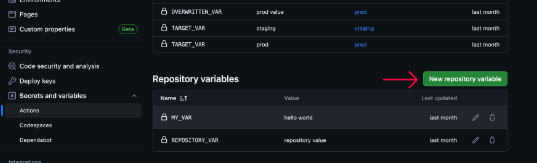

## Expressions

**Expressions allows us to use dynamic values in our workflow**

- They can be used to reference information from multiple sources within the workflow.
- Must use the ${{ <expression> }} syntax
- Expressions are also more versatile than just retrieving some pieces of data, they can be any combinations of :

<img src="./images/expressions">
